# Decision Tree implementation in Python
This notebook describes a basic implementation of a decision tree classifier using scikit-learn. If not already installed, you can install scikit-learn on your machine using this link: https://scikit-learn.org/stable/install.html.

We will take the first four columns as our features and the species column as our target variable. We will do a 75-25% split of the data as the training data and the test data. We need to shuffle the data in order to do this so that our data is a good representative of the population.

In [0]:
# importing the iris dataset
from sklearn import datasets
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.33, random_state = 42, shuffle = True)

In [3]:
# building our decision tree classifier and fitting the model
from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

The output above shows us the value of the parameters (also called as hyperparameters) used by the classifier. We used it with the default values for all the parameters.

In [4]:
# predicting on the train and the test data and assessing the accuracies
from sklearn.metrics import accuracy_score

pred_train = model.predict(X_train)
pred_test = model.predict(X_test)
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
print('Training accuracy is: {0}'.format(train_accuracy))
print('Testing accuracy is: {0}'.format(test_accuracy))

Training accuracy is: 1.0
Testing accuracy is: 0.98


In [5]:
# calculating the accuracy again with max_depth = 2

model2 = tree.DecisionTreeClassifier(max_depth = 2)
model2.fit(X_train, y_train)

pred_train = model2.predict(X_train)
pred_test = model2.predict(X_test)
train_accuracy = accuracy_score(y_train, pred_train)
test_accuracy = accuracy_score(y_test, pred_test)
print('Training accuracy with max_depth = 2 is: {0}'.format(train_accuracy))
print('Testing accuracy with max_depth = 2 is: {0}'.format(test_accuracy))

Training accuracy with max_depth = 2 is: 0.95
Testing accuracy with max_depth = 2 is: 0.98


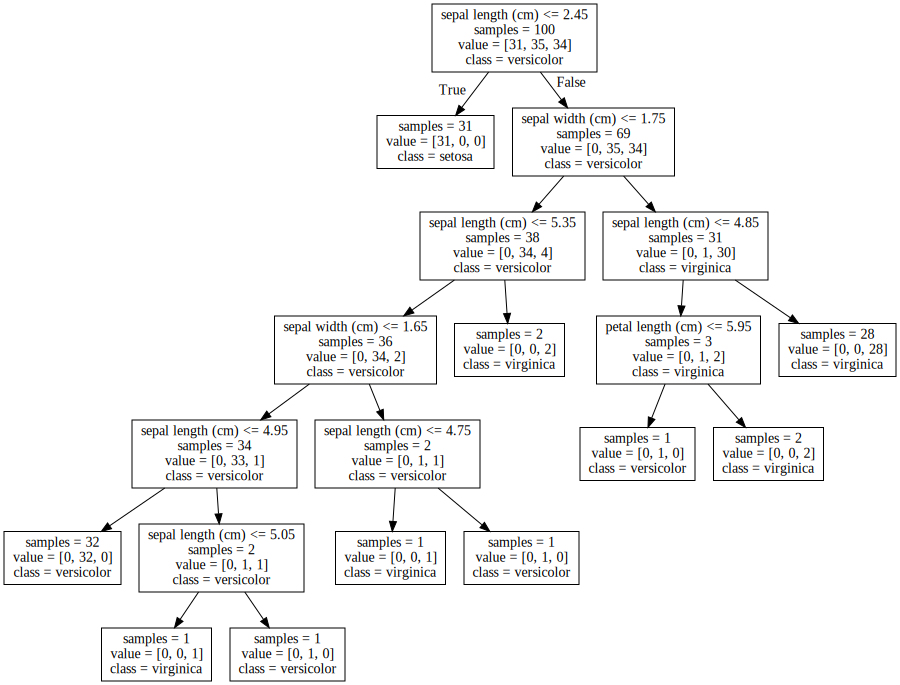

In [6]:
# visualizing our decision tree
# install graphviz using `pip install graphviz` or 
# 'conda install graphviz' or `brew install graphviz`
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model)
graphviz.Source(export_graphviz(model, 
                                out_file=None, 
                                feature_names=sorted(iris.feature_names), 
                                class_names=["setosa", "versicolor", "virginica"], 
                                impurity=False))



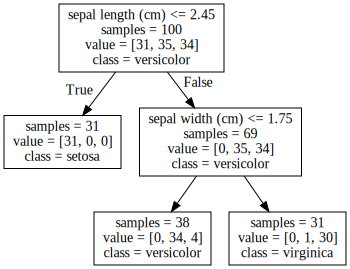

In [7]:
# visualizing our decision tree with max_depth = 2
import graphviz
from sklearn.tree import export_graphviz

dot_data = export_graphviz(model2)
graphviz.Source(export_graphviz(model2, 
                                out_file=None, 
                                feature_names=sorted(iris.feature_names), 
                                class_names=["setosa", "versicolor", "virginica"], 
                                impurity=False))